In [171]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [172]:

train = pd.read_csv("India Hacks 2017/Road Sign/train.csv")
test = pd.read_csv("India Hacks 2017/Road Sign/test.csv")

In [173]:
train[train.SignAspectRatio<0.5].head(20)

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
14,2c9180975a056a64015a1e04ad9f6f8b,Left,258,0.48,39,81,Rear
33,2c9180975a056a64015a1e13b6c7713e,Left,253,0.43,37,87,Rear
45,2c9180975a056a64015a1e58c1407a8d,Left,261,0.33,26,79,Rear
84,2c9180975a056a64015a1e6ed9d67c4c,Right,78,0.44,58,132,Front
129,2c9180975a056a64015a1e3f26a4771b,Left,256,0.45,43,95,Rear
161,2c91808e5aba7da4015acd5409db58f4,Left,253,0.47,24,51,Rear
233,2c9180ad5b853aa1015b8be0a8835a15,Left,254,0.42,28,67,Rear
264,2c91809e5aba7d25015acdd165072a09,Right,81,0.43,64,150,Front
275,2c91808d5aba7da4015acd6c1f235e84,Right,72,0.46,36,79,Front
277,2c91809e5aba7d25015acdd6c89f2a79,Right,72,0.44,63,142,Front


In [174]:
train[train.SignAspectRatio>1.5].head(20)

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
298,2c91809e5aba7d25015acdc892a92935,Right,49,1.58,49,31,Front
438,2c91809659f86230015a088b500a68a0,Right,45,1.51,232,154,Front
465,2c91809659f86230015a09e052c81db7,Rear,227,1.55,62,40,Rear
504,2c91809e5aba7d25015acd9525bc247e,Front,311,1.56,81,52,Front
657,2c91809e5aba7d25015acdc892a9292b,Left,222,1.63,52,32,Rear
776,2c91809e5aba7d25015acd98dbff24cc,Left,305,1.67,50,30,Front
897,2c91809a59f17e5d015a219d7b09302e,Left,222,1.54,105,68,Rear
965,2c91809659f86230015a08569e6c63ca,Rear,135,1.55,68,44,Rear
1144,2c91809a59f17e5d015a21c28ac135cc,Right,44,1.73,235,136,Front
1208,2c91809659f86230015a0875b5246696,Right,43,1.65,134,81,Front


In [175]:
train.describe()

,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
count,38485.000000,38485.000000,38485.000000,38485.000000
mean,132.930986,0.901241,92.922957,104.993140
std,98.042472,0.226068,52.399274,53.347424
min,1.000000,0.260000,19.000000,23.000000
25%,42.000000,0.770000,54.000000,65.000000
50%,80.000000,0.930000,80.000000,96.000000
75%,228.000000,1.040000,118.000000,132.000000
max,360.000000,2.790000,589.000000,513.000000


In [176]:
train['DetectedCamera'].value_counts()

Front    10910
Right    10516
Left      9298
Rear      7761
Name: DetectedCamera, dtype: int64

In [177]:
#encode as integer
mapping = {'Front':0, 'Left':1, 'Rear':2, 'Right':3}
train = train.replace({'DetectedCamera':mapping})
test = test.replace({'DetectedCamera':mapping})

In [178]:
#renaming column
train.rename(columns = {'SignFacing (Target)': 'Target'}, inplace=True)

In [179]:
#encode Target Variable based on sample submission file
mapping = {'Front':0, 'Left':1, 'Rear':2, 'Right':3}
train = train.replace({'Target':mapping})

In [180]:
#target variable
y_train = train['Target']
test_id = test['Id']

In [181]:
y_train.value_counts()

0    21327
2    15662
3      821
1      675
Name: Target, dtype: int64

# EDA

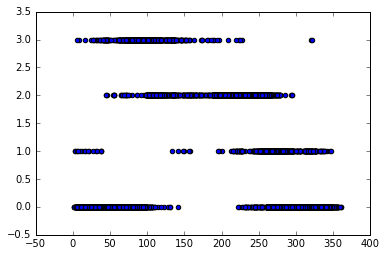

In [182]:
plt.scatter(train.AngleOfSign,y_train)

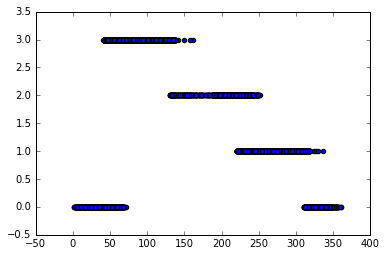

In [183]:
plt.scatter(train.AngleOfSign,train.DetectedCamera)

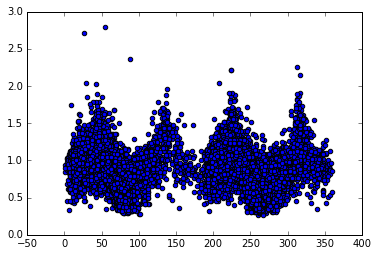

In [184]:
plt.scatter(train.AngleOfSign,train.SignAspectRatio)

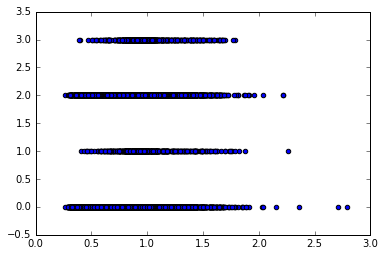

In [185]:
plt.scatter(train.SignAspectRatio,y_train)

# FE

In [186]:
# Accurate SignAspectRatio:

#train["SignAspectRatio"] = train["SignWidth"] / train["SignHeight"]

In [187]:

#train["AngByAsp"] = train["AngleOfSign"] / train["SignAspectRatio"]

In [188]:
#train["AngByW"] = train["AngleOfSign"] / train["SignWidth"]
#train["AngByH"] = train["AngleOfSign"] / train["SignHeight"]


In [189]:
#train["Diff"] = train["SignWidth"] - train["SignHeight"]
#test["Diff"] = test["SignWidth"] - test["SignHeight"]

In [190]:
#train["expected"] = train["DetectedCamera"]

#train.expected[train.SignAspectRatio<0.5] = train.expected[train.SignAspectRatio<0.5]-1
#train.expected[train.SignAspectRatio>1.5] = train.expected[train.SignAspectRatio<0.5]-1


In [191]:
train[train.SignAspectRatio<0.5].head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,Target
14,2c9180975a056a64015a1e04ad9f6f8b,1,258,0.48,39,81,2
33,2c9180975a056a64015a1e13b6c7713e,1,253,0.43,37,87,2
45,2c9180975a056a64015a1e58c1407a8d,1,261,0.33,26,79,2
84,2c9180975a056a64015a1e6ed9d67c4c,3,78,0.44,58,132,0
129,2c9180975a056a64015a1e3f26a4771b,1,256,0.45,43,95,2


In [192]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.transform([1, 1, 2, 6]) 


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [193]:
#drop columns
train.drop(['Target','Id'], inplace=True, axis=1)
test.drop('Id',inplace=True,axis=1)

train.drop('DetectedCamera', inplace=True, axis=1)
test.drop('DetectedCamera',inplace=True,axis=1)


#train.drop(['SignWidth', 'SignHeight'], inplace=True, axis=1)
#test.drop(['SignWidth', 'SignHeight'],inplace=True,axis=1)


In [194]:
#train_X = xgb.Dma(train).tocsr()
#test_X = test.tocsr()


In [168]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=321, num_rounds=100000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.01
    param['max_depth'] = 4
    param['silent'] = 1
    param['num_class'] = 4
    param['lambda'] = 1   
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['nthread'] = 16 
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval = 100)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model



In [169]:
from sklearn import model_selection, preprocessing, ensemble

cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train.shape[0])):
        dev_X, val_X = train.loc[dev_index,:], train.loc[val_index,:]
        dev_Y, val_Y = y_train[dev_index], y_train[val_index]
        preds, model = runXGB(dev_X, dev_Y, val_X, val_Y)
        cv_scores.append(log_loss(val_Y, preds))
        print(cv_scores)
        break

[0]	train-mlogloss:1.36887	test-mlogloss:1.36897
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[100]	train-mlogloss:0.515451	test-mlogloss:0.519781
[200]	train-mlogloss:0.255647	test-mlogloss:0.262061
[300]	train-mlogloss:0.161153	test-mlogloss:0.16951
[400]	train-mlogloss:0.124425	test-mlogloss:0.13499
[500]	train-mlogloss:0.108008	test-mlogloss:0.120624
[600]	train-mlogloss:0.099991	test-mlogloss:0.114349
[700]	train-mlogloss:0.095354	test-mlogloss:0.111414
[800]	train-mlogloss:0.092277	test-mlogloss:0.109862
[900]	train-mlogloss:0.089988	test-mlogloss:0.10912
[1000]	train-mlogloss:0.088075	test-mlogloss:0.108696
[1100]	train-mlogloss:0.086395	test-mlogloss:0.108495
[1200]	train-mlogloss:0.084868	test-mlogloss:0.108411
[1300]	train-mlogloss:0.083371	test-mlogloss:0.10844
Stopping. Best iteration:
[1262]	train-mlogloss:0.083897	test-mlogloss:0.108387

[0.10844751668119736]


In [87]:
#[1095]	train-mlogloss:0.086895	test-mlogloss:0.108355


In [88]:
preds, model = runXGB(train, y_train, test, num_rounds=1095)
out_df = pd.DataFrame(preds)
out_df.columns = ["Front","Left","Rear","Right"]


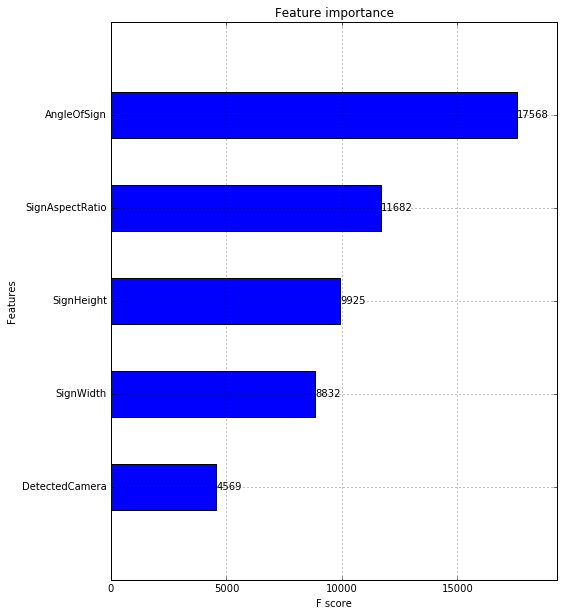

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
xgb.plot_importance(model, height=0.5, ax=ax)

In [ ]:
out_df.describe()

In [ ]:
sample = pd.read_csv("India Hacks 2017/Road Sign/sample_submission.csv")
out_df["Id"] = sample["Id"]
out_df = out_df[['Id','Front','Left','Rear','Right']]
out_df.to_csv("Road_Sign_3.csv", index=False, encoding = 'ascii')


In [ ]:
from IPython.display import FileLink, FileLinks
FileLink('Road_Sign_3.csv')

## Linaer model

In [202]:
from sklearn.linear_model import LogisticRegression


In [203]:
l_model = LogisticRegression()

In [204]:
l_model.fit(train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [208]:
l_pred = l_model.predict_proba(test)

In [210]:
l_pred[1:10,:]

array([[  9.04742020e-01,   4.31645578e-05,   3.28340752e-02,
          6.23807404e-02],
       [  9.68180632e-01,   1.31706314e-06,   3.14570708e-02,
          3.60980143e-04],
       [  9.41368951e-01,   1.87209689e-05,   5.20316233e-02,
          6.58070482e-03],
       [  9.51038672e-01,   1.56009919e-05,   3.33430823e-02,
          1.56026451e-02],
       [  6.83804874e-01,   2.23137426e-04,   3.12424778e-01,
          3.54721105e-03],
       [  9.15537238e-01,   4.01143752e-05,   3.32247197e-02,
          5.11979276e-02],
       [  9.41373612e-01,   1.15225564e-05,   5.20074686e-02,
          6.60739644e-03],
       [  9.58754186e-02,   2.77640888e-02,   8.31531312e-01,
          4.48291807e-02],
       [  1.36770374e-01,   8.62067672e-03,   8.46164964e-01,
          8.44398521e-03]])

In [212]:
out_df_l = pd.DataFrame(l_pred)
out_df_l.columns = ["Front","Left","Rear","Right"]


sample = pd.read_csv("India Hacks 2017/Road Sign/sample_submission.csv")
out_df_l["Id"] = sample["Id"]
out_df_l = out_df_l[['Id','Front','Left','Rear','Right']]
#out_df_l.to_csv("Road_Sign_3_l.csv", index=False, encoding = 'ascii')



In [213]:
out_df_l.head()

,Id,Front,Left,Rear,Right
0,2c9180975a056a64015a1e10d3f270fe,0.979888,4.355050e-07,0.019485,0.000627
1,2c9180975a056a64015a1de4deb16bdc,0.904742,4.316456e-05,0.032834,0.062381
2,2c9180975a056a64015a1e0e70ea70ce,0.968181,1.317063e-06,0.031457,0.000361
3,2c9180975a056a64015a1dfed0c46ec6,0.941369,1.872097e-05,0.052032,0.006581
4,2c9180975a056a64015a1dfed0c46ec7,0.951039,1.560099e-05,0.033343,0.015603


In [215]:
out_df = pd.read_csv("Road_Sign_3.csv")
out_df.head()

,Id,Front,Left,Rear,Right
0,2c9180975a056a64015a1e10d3f270fe,0.995460,0.000247,0.001784,0.002508
1,2c9180975a056a64015a1de4deb16bdc,0.997857,0.000840,0.000235,0.001068
2,2c9180975a056a64015a1e0e70ea70ce,0.997707,0.000165,0.000687,0.001440
3,2c9180975a056a64015a1dfed0c46ec6,0.996606,0.000272,0.000966,0.002157
4,2c9180975a056a64015a1dfed0c46ec7,0.998129,0.000501,0.000172,0.001197


In [216]:
out_avg = out_df
out_avg.Front = out_df.Front * 0.8 + out_df_l.Front * 0.2
out_avg.Left = out_df.Left * 0.8 + out_df_l.Left * 0.2
out_avg.Rear = out_df.Rear * 0.8 + out_df_l.Rear * 0.2
out_avg.Right = out_df.Right * 0.8 + out_df_l.Right * 0.2

In [217]:
out_avg.to_csv("Road_Sign_3_avg_0.8xgb_0.2l.csv", index=False, encoding = 'ascii')

from IPython.display import FileLink, FileLinks
FileLink('Road_Sign_3_avg_0.8xgb_0.2l.csv')

/resources/Road_Sign_3_avg_0.8xgb_0.2l.csv